This notebook helps us aggregate features by artist now

In [27]:
import numpy as np
from util import load_filtered, print_genre_statistics

In [2]:
data = load_filtered('data/lyrics_380k.csv')

154781


In [3]:
artist_list = list(sorted(data.keys())) # map every artist to an index

In [4]:
num_artists = len(artist_list)
print(num_artists)

2944


In [6]:
bow_pca = np.load('data/features_filtered/bow_pca_feat_2_filt.npy')
length = np.load('data/features_filtered/length_feature_filt.npy')
rid = np.load('data/features_filtered/rid_feat_filt.npy')
pos = np.load('data/features_filtered/pos_feat_filt.npy')
ttr = np.load('data/features_filtered/ttr_filt.npy')
uncommon = np.load('data/features_filtered/uncommon_filt.npy')

In [7]:
ttr = ttr.reshape((ttr.shape[0], 1))
uncommon = uncommon.reshape((uncommon.shape[0], 1))

print(bow_pca.shape, length.shape, rid.shape, pos.shape, ttr.shape, uncommon.shape)

(154781, 300) (154781, 4) (154781, 43) (154781, 46) (154781, 1) (154781, 1)


In [8]:
combined = np.concatenate((bow_pca, length, rid, pos, ttr, uncommon), axis=1)
print(combined.shape)

(154781, 395)


In [10]:
result = np.zeros((num_artists, combined.shape[1]))

for a in data:
    inds = data[a]['indices']
    sliced = combined[inds]
    reduce = np.mean(sliced, axis=0)
    a_row = artist_list.index(a)
    result[a_row] = reduce

print(result.shape)

(2944, 395)


In [11]:
np.save('data/artist_agg_features.npy', result)

In [21]:
x = uncommon
print(np.min(x), np.max(x))

0.0 1.0


(array([31.,  3.,  2.,  2.,  3.,  2.,  1.,  0.,  1.,  1.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

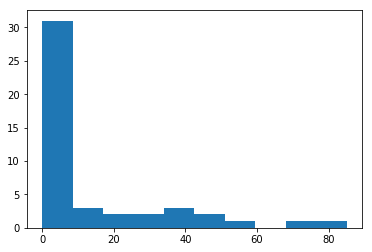

In [26]:
plt.hist(pos[100])

In [28]:
print_genre_statistics(data)

{'Pop': 428, 'Hip-Hop': 268, 'Country': 164, 'Jazz': 126, 'Electronic': 145, 'Rock': 1151, 'Metal': 313, 'Other': 87, 'Not Available': 132, 'Indie': 52, 'R&B': 57, 'Folk': 21}
